In [39]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from data_extraction.dummy_data_extractor import extract_dummy_data

In [40]:
master_table = extract_dummy_data("dummy_data")
#dqStart = master_table.at[0,"dqStart"]
dqStart = '2023-03-10 01:05:00+0400'
df = master_table.at[0,"his"]
df.set_index(df.columns[0], inplace=True, drop=True)
#df = df.dropna()
# Drop rows where df[df.columns[1]] is missing or both are missing
df = df.dropna(subset=[df.columns[1]])
df = df[~(df[df.columns[0]].isna() & df[df.columns[1]].isna())]
master_table

c:\Users\carabbat\OneDrive - Enova Facilities Management\Documents\Hubgrade\Skyspark\Data Imputation\HubgradeDataCleaning\catherine\data_extraction\dummy_data_extractor.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2023-03-12 01:05:00+04:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  pythonDF.loc[i, 'dqStart'] = pd.to_datetime(df['ts'].iloc[i], format="%Y-%m-%dT%H:%M:%S%z Dubai")


,pointID,unit,dqType,dqStart,dqDuration,pointInterval,features,his
0,@p:dmc_All:r:2ddf07d5-ef59ca94 DMC Building 1 ...,°C,Nulls,2023-03-12 01:05:00+04:00,1 days 11:10:00,0 days 00:05:00,[p:dmc_All:r:2de337c0-72b69972],DMC Building 1 Data...
1,@p:dmc_All:r:2ddf07d5-ef59ca94 DMC Building 1 ...,°C,Nulls,2023-03-19 01:10:00+04:00,0 days 23:30:00,0 days 00:05:00,[p:dmc_All:r:2de337c0-72b69972],ts \ 0 2023-03...


In [41]:
# Splitting variables
y = df[df.columns[0]]  # independent variable
X = df[[df.columns[1]]]  # dependent variable

# Drop rows where X is missing or both X and y are missing
#df = df.dropna(subset=[X.columns[0]], how='all')

# Splitting variables
#y = df[df.columns[0]]  # independent variable
#X = df[[df.columns[1]]]  # dependent variable

In [42]:
# Filter data for training and testing
X_train = X[X.index < dqStart]
X_test = X[X.index >= dqStart]
y_train = y[X.index < dqStart]
y_test = y[X.index >= dqStart]

In [43]:
# Generate polynomial features
poly = PolynomialFeatures(degree = 4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train polynomial regression model on the whole dataset
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 1.0805484038852835
Root Mean Squared Error: 1.0394943019975067
R^2 Score: -38.77341212662329


In [45]:
# Create a new DataFrame with the timestamp as index and y_pred as values
pred_df = pd.DataFrame(data=y_pred, index=X_test.index, columns=['y_pred'])
pred_df


,y_pred
ts,
2023-03-10 01:05:00+04:00,23.166546
2023-03-10 01:10:00+04:00,23.166546
2023-03-10 01:15:00+04:00,23.166546
2023-03-10 01:20:00+04:00,23.166546
2023-03-10 01:25:00+04:00,23.166546
...,...
2023-03-12 00:40:00+04:00,22.934544
2023-03-12 00:45:00+04:00,23.002886
2023-03-12 00:50:00+04:00,23.144585


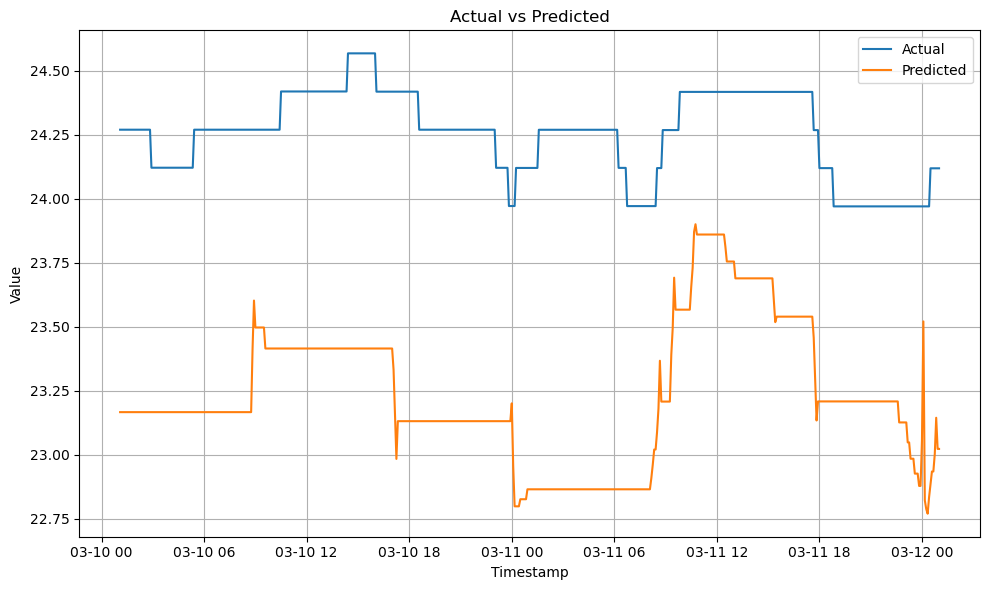

In [46]:
# Plotting y_test and y_pred against timestamps 
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()